# Loan Deliquency Prediction
This hackathon is meant to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months). The submission file should contain two columns - loan_id and m13 (target).

In [1]:
import pandas as pd
import numpy as np

In [98]:
train_df = pd.read_csv('train_u5jK80M/train.csv')
print(train_df.shape)
train_df.head()

(116058, 29)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [75]:
train_df['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [76]:
train_df['m13'].value_counts()/len(train_df)

0    0.99452
1    0.00548
Name: m13, dtype: float64

In [86]:
df_sam0 = train_df.loc[train_df['m13'] == 0]
df_sam1 = train_df.loc[train_df['m13'] == 1]
print(df_sam0.shape)
print(df_sam1.shape)

(115422, 29)
(636, 29)


In [ ]:
# Randomly sample 70% of your dataframe
df_percent = df.sample(frac=0.7)

# Randomly sample 7 elements from your dataframe
df_elements = df.sample(n=7)

In [89]:
df_sam0 = df_sam0.sample(n=1000)
print(df_sam0.shape)
df_sam0.head()

(1000, 29)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
40572,930418462350,X,"Martinez, Duffy and Bird",3.900,259000,360,2012-03-01,05/2012,75,2.0,...,0,0,0,0,0,0,0,0,0,0
3309,489500562579,X,OTHER,3.750,164000,360,2012-02-01,04/2012,80,2.0,...,0,0,0,0,0,0,0,0,0,0
86194,444844529183,X,OTHER,3.250,250000,180,2012-02-01,04/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,0
40116,600988830233,Y,Browning-Hart,4.375,347000,360,2012-01-01,03/2012,79,1.0,...,0,0,0,0,0,0,0,0,0,0
17387,790447850848,X,OTHER,3.375,244000,180,2012-02-01,04/2012,75,1.0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df_sam1.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [92]:
sample_train = df_sam0.append(df_sam1)
print(sample_train.shape)
sample_train.head()

(1636, 29)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
40572,930418462350,X,"Martinez, Duffy and Bird",3.900,259000,360,2012-03-01,05/2012,75,2.0,...,0,0,0,0,0,0,0,0,0,0
3309,489500562579,X,OTHER,3.750,164000,360,2012-02-01,04/2012,80,2.0,...,0,0,0,0,0,0,0,0,0,0
86194,444844529183,X,OTHER,3.250,250000,180,2012-02-01,04/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,0
40116,600988830233,Y,Browning-Hart,4.375,347000,360,2012-01-01,03/2012,79,1.0,...,0,0,0,0,0,0,0,0,0,0
17387,790447850848,X,OTHER,3.375,244000,180,2012-02-01,04/2012,75,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

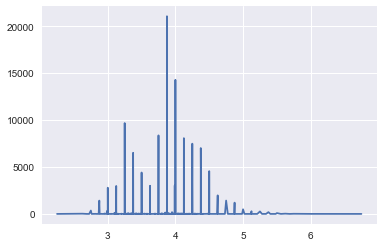

In [20]:
train_df['interest_rate'].value_counts().sort_index().plot.line()

In [26]:
print(len(train_df['source'].unique()))
print(len(train_df['financial_institution'].unique()))
print(len(train_df['loan_purpose'].unique()))

3
19
3


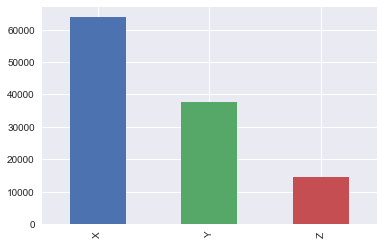

In [25]:
train_df['source'].value_counts().sort_index().plot.bar()

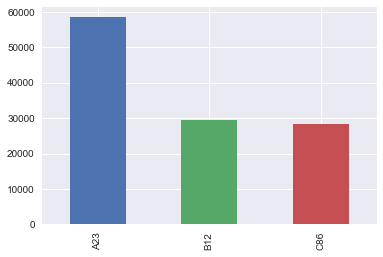

In [27]:
train_df['loan_purpose'].value_counts().sort_index().plot.bar()

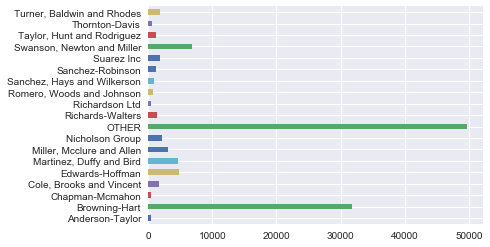

In [29]:
train_df['financial_institution'].unique()
train_df['financial_institution'].value_counts().sort_index().plot.barh()

In [30]:
print(len(train_df['borrower_credit_score'].unique()))
print(len(train_df['co-borrower_credit_score'].unique()))

221
216


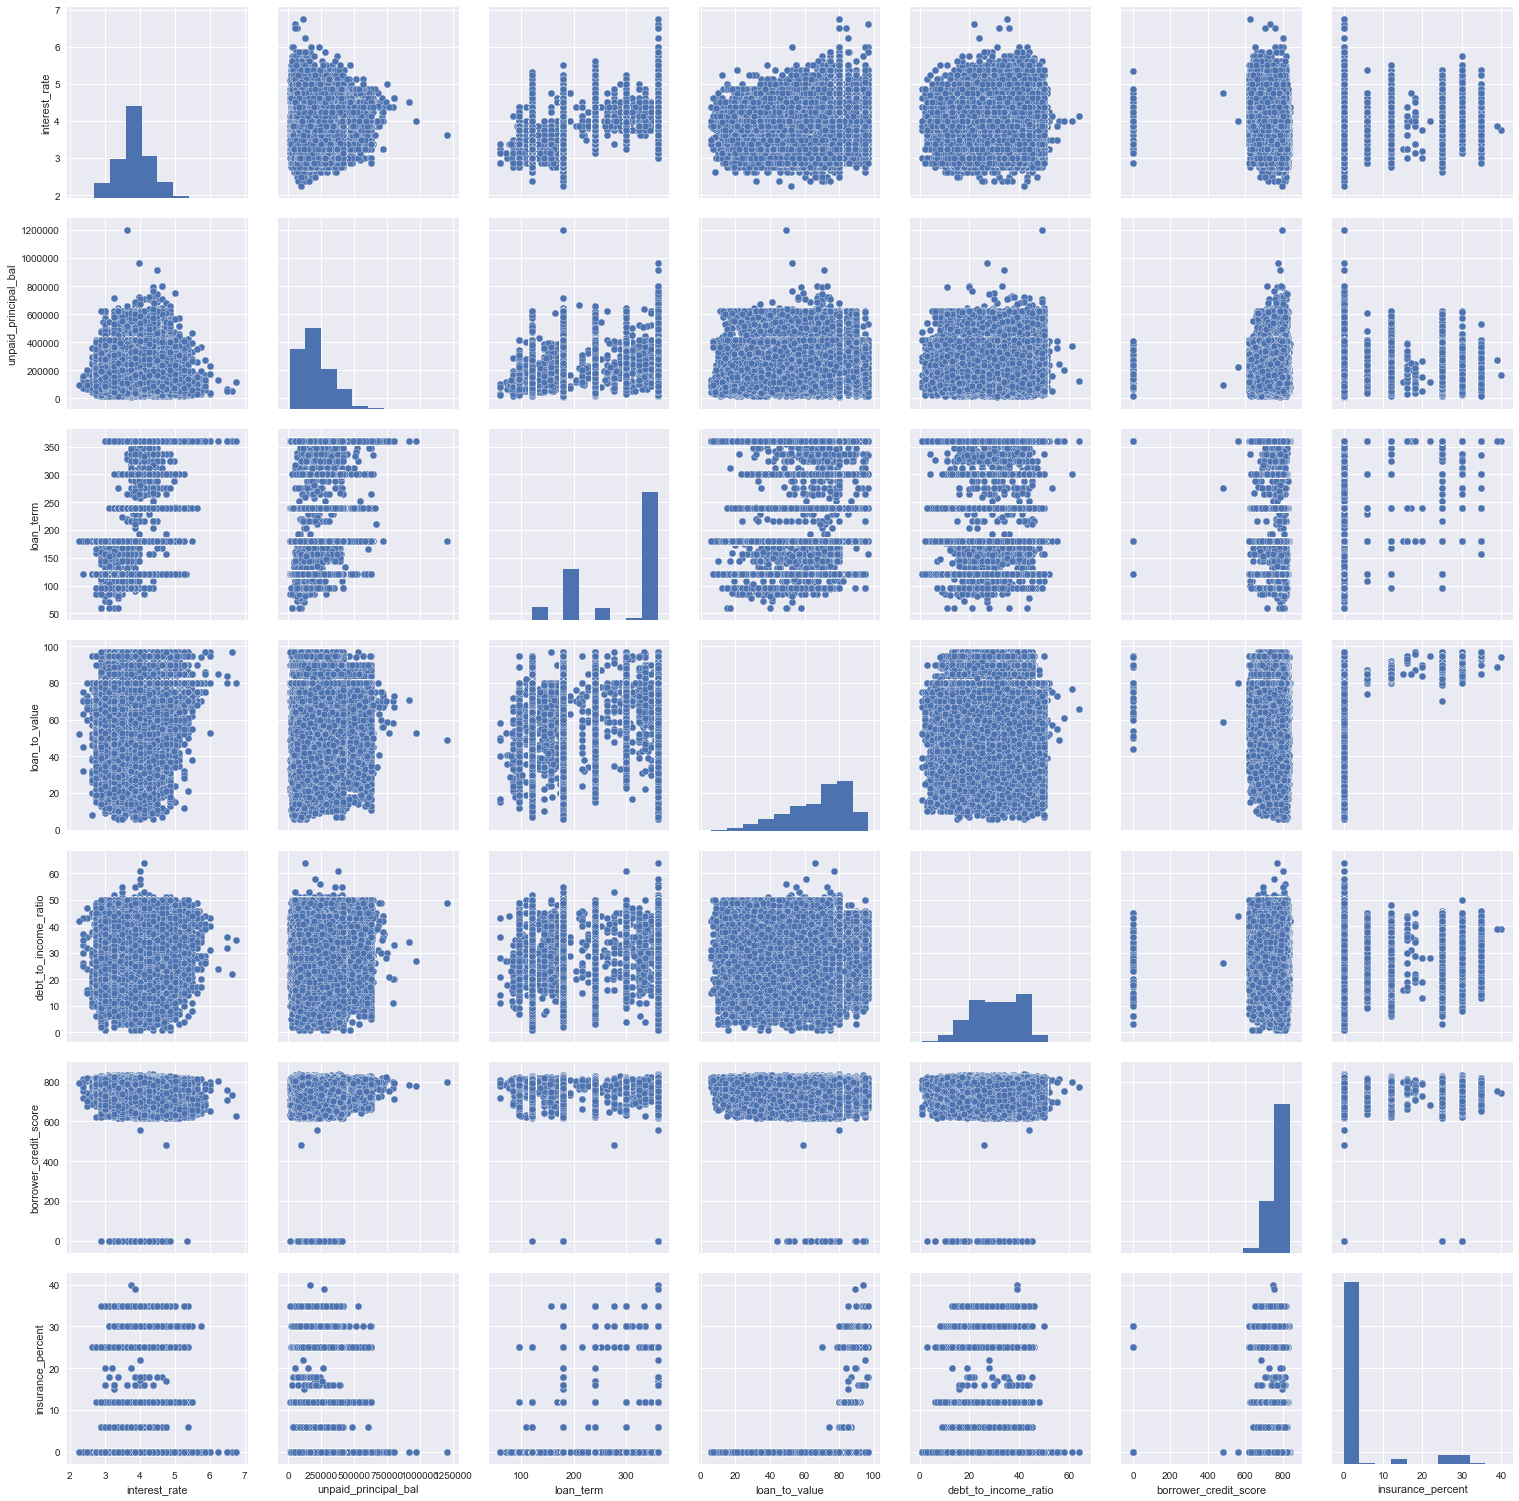

In [31]:
select_columns = ['interest_rate','unpaid_principal_bal', 'loan_term', 'loan_to_value','debt_to_income_ratio',
                 'borrower_credit_score','insurance_percent',]

sns.pairplot(train_df[select_columns], size=3)

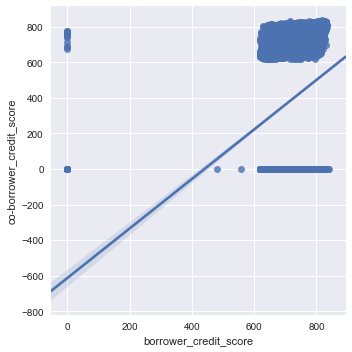

In [32]:
sns.lmplot('borrower_credit_score', 'co-borrower_credit_score', data=train_df, size=5, fit_reg=True)

In [59]:
test_df = pd.read_csv('test_3BA6GZX/test.csv')
print(test_df.shape)
test_df.head()

(35866, 28)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [60]:
test_dummies1 = pd.get_dummies(test_df.source)
test_dummies2 = pd.get_dummies(test_df.loan_purpose)
test_dummies = pd.concat([test_df, test_dummies1, test_dummies2], axis=1)
test_dummies

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m9,m10,m11,m12,X,Y,Z,A23,B12,C86
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,1,0,1,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,1,0,0,0,0,1
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,1,0,0,0,1
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,1,0,0,1,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,1,0,0,1,0,0
5,6,Y,"Sanchez, Hays and Wilkerson",3.625,416000,360,01/02/12,Apr-12,65,2,...,0,0,0,0,0,1,0,0,0,1
6,7,X,OTHER,3.500,272000,180,01/02/12,Apr-12,77,2,...,0,0,0,0,1,0,0,1,0,0
7,8,X,OTHER,3.125,160000,120,01/01/12,Mar-12,54,2,...,0,0,0,0,1,0,0,0,1,0
8,9,X,Thornton-Davis,3.250,236000,180,01/02/12,Apr-12,42,2,...,0,0,0,0,1,0,0,1,0,0
9,10,Z,Browning-Hart,4.375,98000,360,01/02/12,Apr-12,80,1,...,0,0,0,0,0,0,1,0,0,1


In [61]:
columns = ['source', 'financial_institution','origination_date','first_payment_date', 'loan_purpose']
model_test_df = test_dummies.drop(columns, axis=1)
model_test_df

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m9,m10,m11,m12,X,Y,Z,A23,B12,C86
0,1,3.875,417000,360,75,1,20,790,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,4.500,113000,360,80,2,33,793,0,784,...,0,0,0,0,1,0,0,0,0,1
2,3,4.500,72000,360,75,1,34,710,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,4.125,123000,180,41,2,24,798,0,813,...,0,0,0,0,1,0,0,1,0,0
4,5,3.250,166000,180,53,2,12,767,0,768,...,0,0,0,0,1,0,0,1,0,0
5,6,3.625,416000,360,65,2,19,802,0,728,...,0,0,0,0,0,1,0,0,0,1
6,7,3.500,272000,180,77,2,8,777,0,779,...,0,0,0,0,1,0,0,1,0,0
7,8,3.125,160000,120,54,2,18,704,0,803,...,0,0,0,0,1,0,0,0,1,0
8,9,3.250,236000,180,42,2,33,790,0,799,...,0,0,0,0,1,0,0,1,0,0
9,10,4.375,98000,360,80,1,36,737,0,0,...,0,0,0,0,0,0,1,0,0,1


In [99]:
train_dummies1 = pd.get_dummies(train_df.source)
train_dummies2 = pd.get_dummies(train_df.loan_purpose)
train_dummies = pd.concat([train_df, train_dummies1, train_dummies2], axis=1)
train_dummies

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m10,m11,m12,m13,X,Y,Z,A23,B12,C86
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,1,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,1,0,1,0,1,0,0,1,0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,1,0,0,1,0,1,0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,1,1,1,1,1,0,0,0,1,0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,9,10,11,1,1,0,0,0,0,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,1,0,1,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,1,1,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,1,0,1,0,1,0,0
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,2,0,1,1,1,0,0,0,0,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,1,2,2,1,1,0,0,1,0,0


In [72]:
columns = ['source', 'financial_institution','origination_date','first_payment_date', 'loan_purpose']
model_train_df = train_dummies.drop(columns, axis=1)
model_train_df

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m10,m11,m12,m13,X,Y,Z,A23,B12,C86
0,268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,...,0,0,0,1,0,0,1,0,0,1
1,672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
2,742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
3,601385667462,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,...,1,1,1,1,1,0,0,0,1,0
4,273870029961,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,...,9,10,11,1,1,0,0,0,0,1
5,769060024464,4.375,150000,360,80,1.0,46.0,675.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,1
6,148071614687,4.000,59000,360,95,1.0,44.0,723.0,30.0,0.0,...,0,0,0,1,1,0,0,0,0,1
7,853383953266,4.500,319000,300,62,1.0,45.0,652.0,0.0,0.0,...,0,0,0,1,0,1,0,1,0,0
8,423590072335,4.000,520000,360,76,1.0,35.0,808.0,0.0,0.0,...,2,0,1,1,1,0,0,0,0,1
9,308990846816,4.000,214000,360,95,2.0,41.0,702.0,30.0,700.0,...,1,2,2,1,1,0,0,1,0,0


In [93]:
sample_dummies1 = pd.get_dummies(sample_train.source)
sample_dummies2 = pd.get_dummies(sample_train.loan_purpose)
sample_dummies = pd.concat([sample_train, sample_dummies1, sample_dummies2], axis=1)
sample_dummies

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m10,m11,m12,m13,X,Y,Z,A23,B12,C86
40572,930418462350,X,"Martinez, Duffy and Bird",3.900,259000,360,2012-03-01,05/2012,75,2.0,...,0,0,0,0,1,0,0,1,0,0
3309,489500562579,X,OTHER,3.750,164000,360,2012-02-01,04/2012,80,2.0,...,0,0,0,0,1,0,0,0,0,1
86194,444844529183,X,OTHER,3.250,250000,180,2012-02-01,04/2012,62,1.0,...,0,0,0,0,1,0,0,1,0,0
40116,600988830233,Y,Browning-Hart,4.375,347000,360,2012-01-01,03/2012,79,1.0,...,0,0,0,0,0,1,0,1,0,0
17387,790447850848,X,OTHER,3.375,244000,180,2012-02-01,04/2012,75,1.0,...,0,0,0,0,1,0,0,0,1,0
64250,831897308635,X,Browning-Hart,3.250,135000,120,2012-02-01,04/2012,30,2.0,...,0,0,0,0,1,0,0,1,0,0
109196,552213075374,Y,Sanchez-Robinson,3.125,130000,180,2012-02-01,04/2012,52,2.0,...,0,0,0,0,0,1,0,1,0,0
78907,222632315456,Y,Nicholson Group,3.000,417000,120,2012-02-01,04/2012,70,2.0,...,0,0,0,0,0,1,0,0,1,0
115151,486719154969,Y,Browning-Hart,4.125,336000,360,2012-01-01,03/2012,80,1.0,...,0,0,0,0,0,1,0,0,0,1
21386,109822165079,X,Nicholson Group,3.875,173000,360,2012-02-01,04/2012,71,2.0,...,0,0,0,0,1,0,0,1,0,0


In [94]:
columns = ['source', 'financial_institution','origination_date','first_payment_date', 'loan_purpose']
model_sample_df = sample_dummies.drop(columns, axis=1)
model_sample_df

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m10,m11,m12,m13,X,Y,Z,A23,B12,C86
40572,930418462350,3.900,259000,360,75,2.0,26.0,773.0,0.0,751.0,...,0,0,0,0,1,0,0,1,0,0
3309,489500562579,3.750,164000,360,80,2.0,35.0,807.0,0.0,821.0,...,0,0,0,0,1,0,0,0,0,1
86194,444844529183,3.250,250000,180,62,1.0,23.0,774.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
40116,600988830233,4.375,347000,360,79,1.0,28.0,720.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
17387,790447850848,3.375,244000,180,75,1.0,45.0,764.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
64250,831897308635,3.250,135000,120,30,2.0,23.0,823.0,0.0,801.0,...,0,0,0,0,1,0,0,1,0,0
109196,552213075374,3.125,130000,180,52,2.0,24.0,750.0,0.0,765.0,...,0,0,0,0,0,1,0,1,0,0
78907,222632315456,3.000,417000,120,70,2.0,44.0,786.0,0.0,799.0,...,0,0,0,0,0,1,0,0,1,0
115151,486719154969,4.125,336000,360,80,1.0,34.0,759.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
21386,109822165079,3.875,173000,360,71,2.0,35.0,737.0,0.0,750.0,...,0,0,0,0,1,0,0,1,0,0


In [54]:
cont_var = ['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers',
             'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score']
train_df[cont_var].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
interest_rate,116058.0,3.868961,0.461020,2.25,3.5,3.875,4.125,6.75
unpaid_principal_bal,116058.0,208226.223095,114685.099114,11000.00,120000.0,183000.000,278000.000,1200000.00
loan_term,116058.0,292.280997,89.762415,60.00,180.0,360.000,360.000,360.00
loan_to_value,116058.0,67.431939,17.291719,6.00,57.0,72.000,80.000,97.00
number_of_borrowers,116058.0,1.593186,0.491242,1.00,1.0,2.000,2.000,2.00
debt_to_income_ratio,116058.0,30.742293,9.730798,1.00,23.0,31.000,39.000,64.00
borrower_credit_score,116058.0,769.926778,42.210706,0.00,751.0,782.000,800.000,840.00
insurance_percent,116058.0,2.786288,8.096464,0.00,0.0,0.000,0.000,40.00
co-borrower_credit_score,116058.0,459.611565,381.946926,0.00,0.0,740.000,791.000,836.00


C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


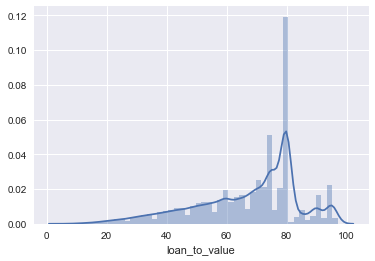

In [112]:
sns.distplot(train_df['loan_to_value'])

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


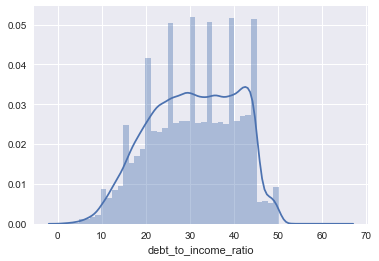

In [118]:
sns.distplot(train_df['debt_to_income_ratio'])

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


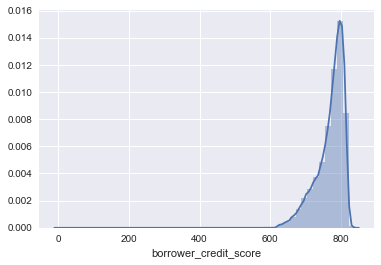

In [119]:
sns.distplot(train_df['borrower_credit_score'])

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


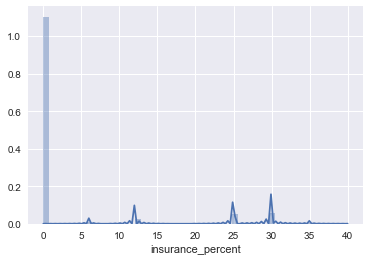

In [120]:
sns.distplot(train_df['insurance_percent'])

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


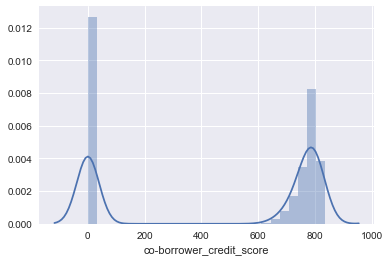

In [121]:
sns.distplot(train_df['co-borrower_credit_score'])

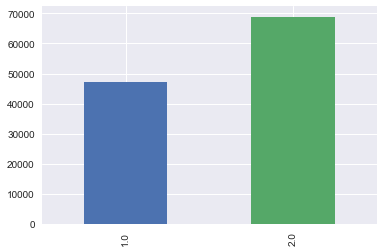

In [117]:
train_df['number_of_borrowers'].value_counts().sort_index().plot.bar()

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


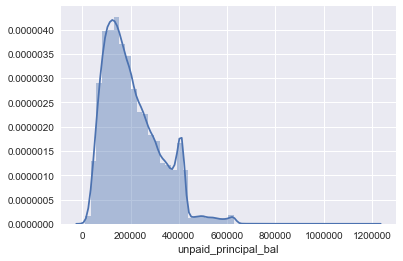

In [55]:
sns.distplot(train_df['unpaid_principal_bal'])

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


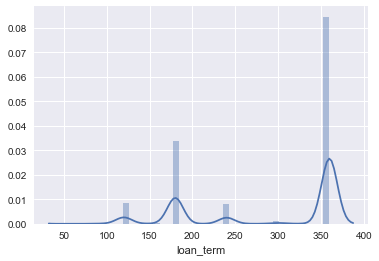

In [107]:
sns.distplot(train_df['loan_term'])

In [102]:
df_bin_train = train_df.copy()
bins = [2, 3, 4, 5, 6,7]
labels = [2,3,4,5,6]
df_bin_train['IR_bin'] = pd.cut(df_bin_train['interest_rate'], bins=bins, labels=labels)
df_bin_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m5,m6,m7,m8,m9,m10,m11,m12,m13,IR_bin
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,1,0,0,0,0,0,1,4
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,1,0,1,4
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,1,3
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,1,1,1,1,1,4
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,4,5,6,7,8,9,10,11,1,4


In [106]:
bin2 = [11000, 120000, 183000, 278000, 650000, 1200000]
label2 = [1, 2, 3, 4, 5] #based on quantile and distribution, so not using qcut
df_bin_train['upbal_bin'] = pd.cut(df_bin_train['unpaid_principal_bal'], bins=bin2, labels=label2)
df_bin_train.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m6,m7,m8,m9,m10,m11,m12,m13,IR_bin,upbal_bin
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,1,0,0,0,0,0,1,4,3
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,1,0,1,4,2
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,1,3,4
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,1,1,1,1,1,4,2
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,5,6,7,8,9,10,11,1,4,2
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,1,4,2
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,1,3,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,1,4,4
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,2,0,1,1,3,4
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,1,1,1,1,1,2,2,1,3,3


In [108]:
bin3 = [60, 120, 180, 240, 300, 360]
#label2 = [1, 2, 3, 4, 5] #based on quantile and distribution, so not using qcut
df_bin_train['lt_bin'] = pd.cut(df_bin_train['loan_term'], bins=bin3, labels=label2)
df_bin_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m7,m8,m9,m10,m11,m12,m13,IR_bin,upbal_bin,lt_bin
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,1,0,0,0,0,0,1,4,3,5
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,1,0,1,4,2,5
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,1,3,4,2
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,1,1,1,1,1,4,2,5
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,6,7,8,9,10,11,1,4,2,5


In [114]:
label3 = [1, 2, 3, 4]
df_bin_train['ltv_bin'] = pd.qcut(df_bin_train['loan_to_value'], 4, labels=label3)
df_bin_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m8,m9,m10,m11,m12,m13,IR_bin,upbal_bin,lt_bin,ltv_bin
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,0,0,1,4,3,5,4
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,1,0,1,4,2,5,2
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,1,3,4,2,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,1,1,1,1,1,4,2,5,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,7,8,9,10,11,1,4,2,5,3


In [122]:
df_bin_train['bcs_bin'] = pd.qcut(df_bin_train['borrower_credit_score'], 4, labels=label3)
df_bin_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m9,m10,m11,m12,m13,IR_bin,upbal_bin,lt_bin,ltv_bin,bcs_bin
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,0,1,4,3,5,4,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,1,0,1,4,2,5,2,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,1,3,4,2,1,2
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,1,1,1,1,1,4,2,5,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,8,9,10,11,1,4,2,5,3,1


In [123]:
df_bin_train['dtir_bin'] = pd.qcut(df_bin_train['debt_to_income_ratio'], 4, labels=label3)
df_bin_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m10,m11,m12,m13,IR_bin,upbal_bin,lt_bin,ltv_bin,bcs_bin,dtir_bin
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,4,3,5,4,1,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,1,0,1,4,2,5,2,1,4
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,1,3,4,2,1,2,3
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,1,1,1,1,4,2,5,1,1,4
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,9,10,11,1,4,2,5,3,1,4


In [130]:
bin4 = [0,10,20,30,40]
label4 = [0,1,2,3]
df_bin_train['ip_bin'] = pd.cut(df_bin_train['insurance_percent'], bins=bin4, labels=label4)
df_bin_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m11,m12,m13,IR_bin,upbal_bin,lt_bin,ltv_bin,bcs_bin,dtir_bin,ip_bin
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,1,4,3,5,4,1,1,2.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,1,0,1,4,2,5,2,1,4,NaN
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,1,3,4,2,1,2,3,NaN
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,1,1,1,4,2,5,1,1,4,NaN
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,10,11,1,4,2,5,3,1,4,NaN


In [131]:
df_bin_train['ip_bin'].fillna(1, inplace=True)
df_bin_train[['insurance_percent','ip_bin']].head(10)

,insurance_percent,ip_bin
0,30.0,2
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1
5,0.0,1
6,30.0,2
7,0.0,1
8,0.0,1
9,30.0,2


In [136]:
bin_dummies1 = pd.get_dummies(df_bin_train.source)
bin_dummies2 = pd.get_dummies(df_bin_train.loan_purpose)
bin_dummies = pd.concat([df_bin_train, bin_dummies1, bin_dummies2], axis=1)
bin_dummies

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,ltv_bin,bcs_bin,dtir_bin,ip_bin,X,Y,Z,A23,B12,C86
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,4,1,1,2,0,0,1,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,2,1,4,1,0,1,0,0,1,0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,1,2,3,1,0,0,1,0,1,0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,1,1,4,1,1,0,0,0,1,0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,1,4,1,1,0,0,0,0,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,3,1,4,1,0,1,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,4,1,4,2,1,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,2,1,4,1,0,1,0,1,0,0
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,3,4,3,1,1,0,0,0,0,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,4,1,4,2,1,0,0,1,0,0


In [ ]:
columns = ['source', 'financial_institution','origination_date','first_payment_date', 'loan_purpose']
model_sample_df = sample_dummies.drop(columns, axis=1)
model_sample_df

In [138]:
ubin_col = ['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'debt_to_income_ratio',
            'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'financial_institution','origination_date',
            'first_payment_date','source', 'loan_purpose']
df_bin_train_model = bin_dummies.drop(bin_dummies[ubin_col], axis=1)
print(df_bin_train_model.shape)
df_bin_train_model.head()

(116058, 29)


,loan_id,number_of_borrowers,insurance_type,m1,m2,m3,m4,m5,m6,m7,...,ltv_bin,bcs_bin,dtir_bin,ip_bin,X,Y,Z,A23,B12,C86
0,268055008619,1.0,0.0,0,0,0,0,0,0,1,...,4,1,1,2,0,0,1,0,0,1
1,672831657627,1.0,0.0,0,0,0,0,0,0,0,...,2,1,4,1,0,1,0,0,1,0
2,742515242108,1.0,0.0,0,0,0,0,0,0,0,...,1,2,3,1,0,0,1,0,1,0
3,601385667462,2.0,0.0,0,0,0,0,0,0,0,...,1,1,4,1,1,0,0,0,1,0
4,273870029961,1.0,0.0,0,1,2,3,4,5,6,...,3,1,4,1,1,0,0,0,0,1


In [14]:
test_df.drop(['financial_institution','origination_date','first_payment_date','source'],axis=1,inplace=True)
features = test_df.columns.values.tolist()
features

['loan_id',
 'interest_rate',
 'unpaid_principal_bal',
 'loan_term',
 'loan_to_value',
 'number_of_borrowers',
 'debt_to_income_ratio',
 'borrower_credit_score',
 'insurance_percent',
 'co-borrower_credit_score',
 'insurance_type',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12']

In [47]:
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X = model_train_df.drop('m13', axis=1).values
y = model_train_df.m13.values

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=0, test_size=0.3)

In [95]:
# splitting data into training and validation set
X_s = model_sample_df.drop('m13', axis=1).values
y_s = model_sample_df.m13.values

xtrain_s, xvalid_s, ytrain_s, yvalid_s = train_test_split(X_s, y_s, random_state=0, test_size=0.2)

In [140]:
# splitting data into training and validation set
X_b = model_sample_df.drop('m13', axis=1).values
y_b = model_sample_df.m13.values

xtrain_b, xvalid_b, ytrain_b, yvalid_b = train_test_split(X_b, y_b, random_state=0, test_size=0.3)

In [96]:
clf_s = RandomForestClassifier()

clf_s.fit(xtrain_s, ytrain_s)

pred_valid_s = clf_s.predict(xvalid_s)

accuracy_test = accuracy_score(pred_valid_s,yvalid_s)
print(accuracy_test)

0.829268292683


In [97]:
model_test_df = model_test_df.drop('m13', axis=1)
pred_test_s = clf_s.predict(model_test_df)
model_test_df['m13'] = pd.DataFrame(pred_test_s.tolist())
model_test_df[['loan_id', 'm13']].to_csv("avml_submission3.csv", index=False)

In [141]:
clf_b = RandomForestClassifier()

clf_b.fit(xtrain_b, ytrain_b)

pred_valid_b = clf_b.predict(xvalid_b)

accuracy_test = accuracy_score(pred_valid_b,yvalid_b)
print(accuracy_test)

0.853360488798


In [142]:
model_test_df = model_test_df.drop('m13', axis=1)
pred_test_b = clf_b.predict(model_test_df)
model_test_df['m13'] = pd.DataFrame(pred_test_b.tolist())
model_test_df[['loan_id', 'm13']].to_csv("avml_submission4.csv", index=False)

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(xtrain, ytrain)

pred_train = clf.predict(xtrain)
pred_valid = clf.predict(xvalid)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,ytrain)
accuracy_test = accuracy_score(pred_valid,yvalid)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(ytrain), clf.predict_proba(xtrain)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(yvalid), clf.predict_proba(xvalid)[:,1])
auc_test = metrics.auc(fpr,tpr)

In [57]:
print(accuracy_train)
print(accuracy_test)

0.99927375677
0.995720604285


In [63]:
#pred_test = clf.predict(tv.transform(xtest))
pred_test = clf.predict(model_test_df)
model_test_df['m13'] = pd.DataFrame(pred_test.tolist())
model_test_df[['loan_id', 'm13']].to_csv("avml_submission1.csv", index=False)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) # training the model

y_pred = lreg.predict(xvalid) # predicting on the validation set
#prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#prediction_int = prediction_int.astype(np.int)

#print(f1_score(yvalid, y_pred)) # calculating f1 score
print(classification_report(yvalid, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     34633
          1       0.00      0.00      0.00       185

avg / total       0.99      0.99      0.99     34818



C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
model_test_df = model_test_df.drop('m13', axis=1)
pred_test = lreg.predict(model_test_df)
model_test_df['m13'] = pd.DataFrame(pred_test.tolist())
model_test_df[['loan_id', 'm13']].to_csv("avml_submission2.csv", index=False)

In [143]:
lreg_b = LogisticRegression()
lreg_b.fit(xtrain_b, ytrain_b) # training the model

y_pred_b = lreg.predict(xvalid_b) # predicting on the validation set
#prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#prediction_int = prediction_int.astype(np.int)

#print(f1_score(yvalid, y_pred)) # calculating f1 score
print(classification_report(yvalid_b, y_pred_b))

             precision    recall  f1-score   support

          0       0.61      1.00      0.76       299
          1       0.00      0.00      0.00       192

avg / total       0.37      0.61      0.46       491



C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
model_test_df = model_test_df.drop('m13', axis=1)
pred_test_b = lreg_b.predict(model_test_df)
model_test_df['m13'] = pd.DataFrame(pred_test_b.tolist())
model_test_df[['loan_id', 'm13']].to_csv("avml_submission5.csv", index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(xtrain, ytrain)
y_pred = clf.predict(xvalid)
f1_score(xvalid, yvalid)

In [ ]:
import xgboost as xgb



In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import cross_validation, metrics
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import cross_val_score

In [ ]:
test.drop('loan_status',axis=1,inplace=1)